# Exploratory Analysis on 120 years of Olympic History

## Priyam Banerjee   
### University of Texas at Arlington

References :
Pandas Documentation (pandas.pydata.org), 
https://stackoverflow.com , 
seaborn.pydata.org , https://www.kaggle.com/marcogdepinto


## Details

We will conduct a guided exploration over the Olympic History dataset. Learning to use some of the most common exploration/aggregation/descriptive operations. Experimentation on data manipulation and analysis using Pandas.


## Dataset Details

120 years of Olympic History dataset. From kaggle repository (https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results). The file athlete_events.csv contains 271.116 rows and 15 columns. This dataset begins with the 1896 Athens, Greece Olympics, and runs up to the 2016 Rio, Brazil Olympic Games. Each row corresponds to an athlete competing in an individual Olympic event. The columns of the data-set are:

- ID - Unique number for each athlete
- Name - Athlete's name
- Sex - M or F
- Age - Integer
- Height - In centimeters
- Weight - In kilograms
- Team - Team name
- NOC - National Olympic Committee 3-letter code
- Games - Year and season
- Year - Integer
- Season - Summer or Winter
- City - Host city
- Sport - Sport
- Event - Event
- Medal - Gold, Silver, Bronze, or NA

In [7]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset
The Python code below reads the Olympic History dataset into a Pandas data frame with the name df_Olympic. 
For this code to work, the file 'athlete_events.csv' must be in the same folder as this file.

In [2]:
#read the csv file into a Pandas data frame
df_olympics = pd.read_csv('athlete_events.csv', encoding='latin1')

#return the first 5 rows of the dataset
df_olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


#  Statistical Exploratory Data Analysis
Let us start with getting to know the dataset. Some basic information by using Pandas features.

In [19]:

#Print the details of the df_olympics data frame (information such as number of rows,columns, name of columns, etc)
num_rows = df_olympics.shape[0]
num_cols = df_olympics.shape[1]
print (">> Details of df_olympics data frame are: \n No. of rows : %s ; No. of cols : %s"% (num_rows, num_cols) ) 
print("Name of Columns are : ")
print(list(df_olympics))

#Find the number of rows and columns in the df_olympics data frame.

print ("\n>> Total number of rows : %s and Total number of columns: %s" % (num_rows, num_cols)) 

# Print the descriptive detail (min, max, quartiles etc) for 'Age' column of  the df_olympics
print ("\n>> Descriptive details of year column are :- ")
print("Maximum Age of Partcipant : %s" %int(df_olympics['Age'].max()))
print("Maximum Age of Partcipant : %s" %int(df_olympics['Age'].min()))
print("Mean Age of Partcipants : %s" %df_olympics.Age.mean())
print("Median Age of Partcipants : %s" %int(df_olympics['Age'].median()))
print("10th Percentile (0.1 Quantile) Age of Partcipants : %s" %df_olympics.Age.quantile(0.1))
print("50th Percentile Age of Partcipants (MEDIAN) : %s" %df_olympics.Age.quantile(0.5))
print("90th Percentile (0.9 Quantile) Age of Partcipants : %s" %df_olympics.Age.quantile(0.9))

#Print the number of years from the first game until the last in our data-set, and the number of  unique values for 'games'.
num_tot_years = df_olympics.Year.max() - df_olympics.Year.min()
num_uniq_games = df_olympics.Games.nunique()
num_uniq_sports = df_olympics.Sport.nunique()
print ("\n>>In our dataset we have historical data for %s years, for %s unique games and %s unique sports. " % (num_tot_years, num_uniq_games,num_uniq_sports))


>> Details of df_olympics data frame are: 
 No. of rows : 271116 ; No. of cols : 15
Name of Columns are : 
['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal']

>> Total number of rows : 271116 and Total number of columns: 15

>> Descriptive details of year column are :- 
Maximum Age of Partcipant : 97
Maximum Age of Partcipant : 10
Mean Age of Partcipants : 25.556898357297374
Median Age of Partcipants : 24
10th Percentile (0.1 Quantile) Age of Partcipants : 19.0
50th Percentile Age of Partcipants (MEDIAN) : 24.0
90th Percentile (0.9 Quantile) Age of Partcipants : 33.0

>>In our dataset we have historical data for 120 years, for 51 unique games and 66 unique sports. 


# Aggregation & Filtering & Rank
In this task, we will perform some very high level aggregation and filtering operations. 
Then, we will apply ranking on the results for some tasks. 
Pandas has a convenient and powerful syntax for aggregation, filtering, and ranking. 
Pandas has built-in functions for all tasks. 

In [20]:

# Find out the total number of female and male athletes that participated on the 2004 Olympics Games
num_female_2004 = df_olympics['Name'].loc[(df_olympics['Sex'] == 'F') & (df_olympics['Year'] == 2004)].nunique()
num_male_2004   = df_olympics['Name'].loc[(df_olympics['Sex'] == 'M') & (df_olympics['Year'] == 2004)].nunique()

print (">> At the Olympics of 2004, there were participating \n%s female and %s male athletes" 
       % (num_female_2004, num_male_2004))
'''
print(" No. of female athletes in 2004 Olympic Games : %s  " %num_female_2004)
print(" No. of male athletes in 2004 Olympic Games : %s  " %num_male_2004)
'''

# Find out the total number of awarded metals for the year 1896, and the year 2016.
num_medals_1986 = df_olympics['ID'].loc[(df_olympics['Medal'] != 'NA') & (df_olympics['Year'] == 1986)].count()
num_medals_1896 = df_olympics['ID'].loc[(df_olympics['Medal'] != 'NA') & (df_olympics['Year'] == 1896)].count()
num_medals_2016 = df_olympics['ID'].loc[(df_olympics['Medal'] != 'NA') & (df_olympics['Year'] == 2016)].count()

print ("\n>> The total number of medals awarded in \nYear 1986 (No Olympics) was %s, in Year 1896 was %s , while in Year 2016 was %s" 
       % (num_medals_1986,num_medals_1896, num_medals_2016))


# Find out the top 10 athletes with the most gold medals for all years.
goldMedals = df_olympics[(df_olympics.Medal == 'Gold')]
top10_gold_athletes=goldMedals['Name'].value_counts().reset_index(name='Total Gold').head(10)
top10_gold_athletes.rename(columns={'index':'Name'} , inplace=True)
print ("\n>> The top 10 athletes (w.r.t Gold Medal count) for all years are:")
top10_gold_athletes.style.set_properties(**{'text-align':'right'})


>> At the Olympics of 2004, there were participating 
4288 female and 6252 male athletes

>> The total number of medals awarded in 
Year 1986 (No Olympics) was 0, in Year 1896 was 380 , while in Year 2016 was 13688

>> The top 10 athletes (w.r.t Gold Medal count) for all years are:


,Name,Total Gold
0,"Michael Fred Phelps, II",23
1,"Raymond Clarence ""Ray"" Ewry",10
2,Paavo Johannes Nurmi,9
3,"Frederick Carlton ""Carl"" Lewis",9
4,Larysa Semenivna Latynina (Diriy-),9
5,Mark Andrew Spitz,9
6,Ole Einar Bjrndalen,8
7,Usain St. Leo Bolt,8
8,Birgit Fischer-Schmidt,8
9,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",8


# Visualization
Here we will perform a number of visualization tasks to get some intuition about the data. Using Seaborn for plotting and visualizations.

    Year  TotalAthletes
0   1896            380
1   1900           1936
2   1904           1301
3   1906           1733
4   1908           3101
5   1912           4040
6   1920           4292
7   1924           5233
8   1928           4992
9   1932           2969
10  1936           6506
11  1948           6405
12  1952           8270
13  1956           5127
14  1960           8119
15  1964           7702
16  1968           8588
17  1972          10304
18  1976           8641
19  1980           7191
20  1984           9454
21  1988          12037
22  1992          12977
23  1996          13780
24  2000          13821
25  2004          13443
26  2008          13602
27  2012          12920
28  2016          13688


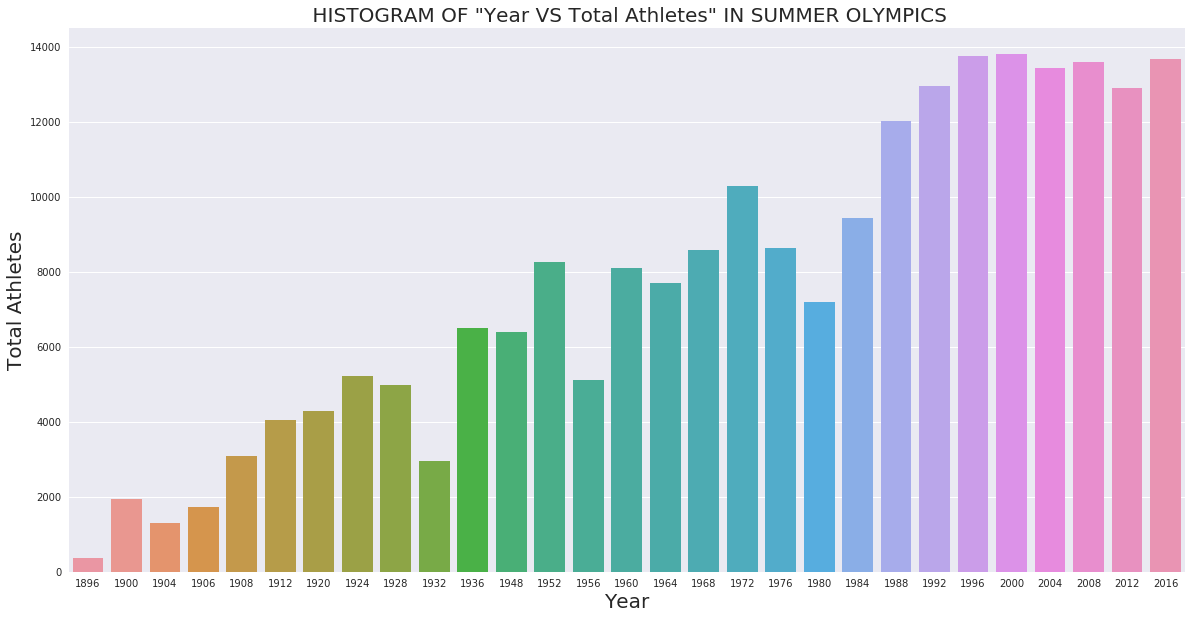

Top 10 tallest players in Olympics history are :
     index                            PlayerName  PlayerHeight
0  265040                              Yao Ming         226.0
1   32376                  Tommy Loren Burleson         223.0
2   17669                        Gunther Behnke         221.0
3  141983            Lucien James "Luc" Longley         220.0
4  166544        Dmitry Aleksandrovich Musersky         219.0
5   22743                              Uwe Blab         218.0
6   14132                           Stanko Bara         217.0
7   38381                Tyson Cleotis Chandler         216.0
8    7467        Vladimir Georgiyevich Andreyev         215.0
9   21577  Oleksandr Mykhailovych Bielostienniy         214.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

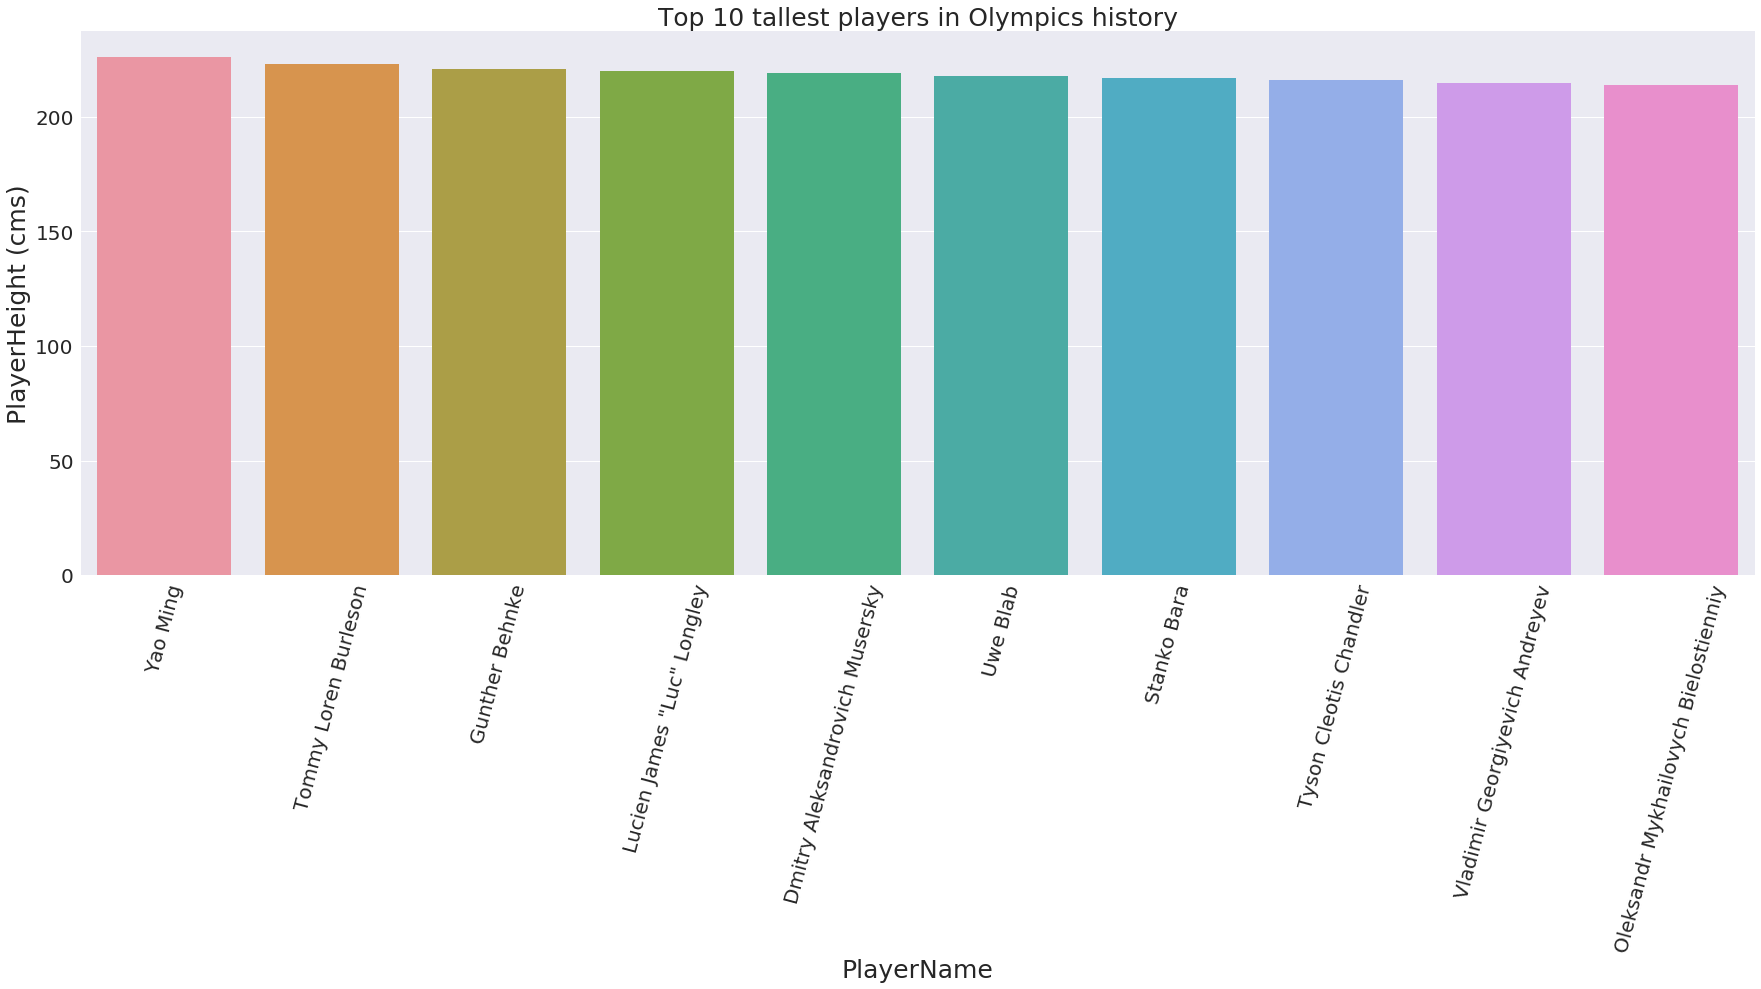

In [16]:
sns.set_style('whitegrid')
sns.set(font_scale = 3)
sns.set(color_codes=True)
plt.figure(figsize=(20, 10))
plt.tight_layout()

# Draw a histogram for total number of athletes participated in all Summer Olympic Games. 
summerOlympics = df_olympics[(df_olympics.Season == 'Summer')].groupby(['Year']).size().reset_index(name='TotalAthletes')
summerOlympics.style.set_properties(**{'text-align':'right'})
print(summerOlympics)

g = sns.barplot(x=summerOlympics['Year'], y=summerOlympics['TotalAthletes'] , data=df_olympics)
plt.title(' HISTOGRAM OF \"Year VS Total Athletes\" IN SUMMER OLYMPICS',fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total Athletes', fontsize=20)
plt.show()

##################################################################################################################

sns.set_style('whitegrid')
sns.set(font_scale=2)
sns.set(color_codes=True)
plt.figure(figsize=(30, 10))
plt.tight_layout()

athletes = df_olympics.nlargest(100,'Height',keep='first')
distinct_tallest_athletes = athletes['Name'].drop_duplicates().reset_index(name='PlayerName')
tallest_athletes_height = athletes['Height'].drop_duplicates().reset_index(name='PlayerHeight')
df_tallest_player = pd.merge(distinct_tallest_athletes , tallest_athletes_height , on='index').head(10)
print("Top 10 tallest players in Olympics history are :\n",df_tallest_player)
h = sns.barplot(x=df_tallest_player['PlayerName'] , y=df_tallest_player['PlayerHeight'], data=athletes)
plt.xlabel('PlayerName', fontsize=25)
plt.ylabel('PlayerHeight (cms)', fontsize=25)
plt.title('Top 10 tallest players in Olympics history', fontsize=25)
plt.tick_params(labelsize=20)
plt.xticks(rotation=75)


# Finally
Let's find out some 'interesting' information from our Olympic History dataset. Also creating visualization for them.

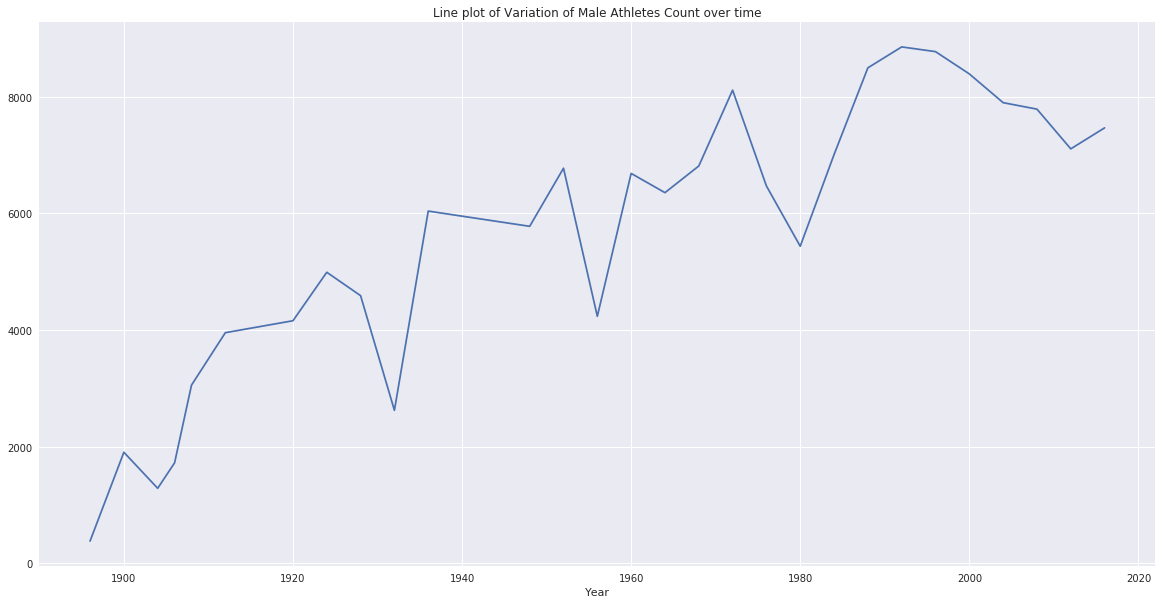

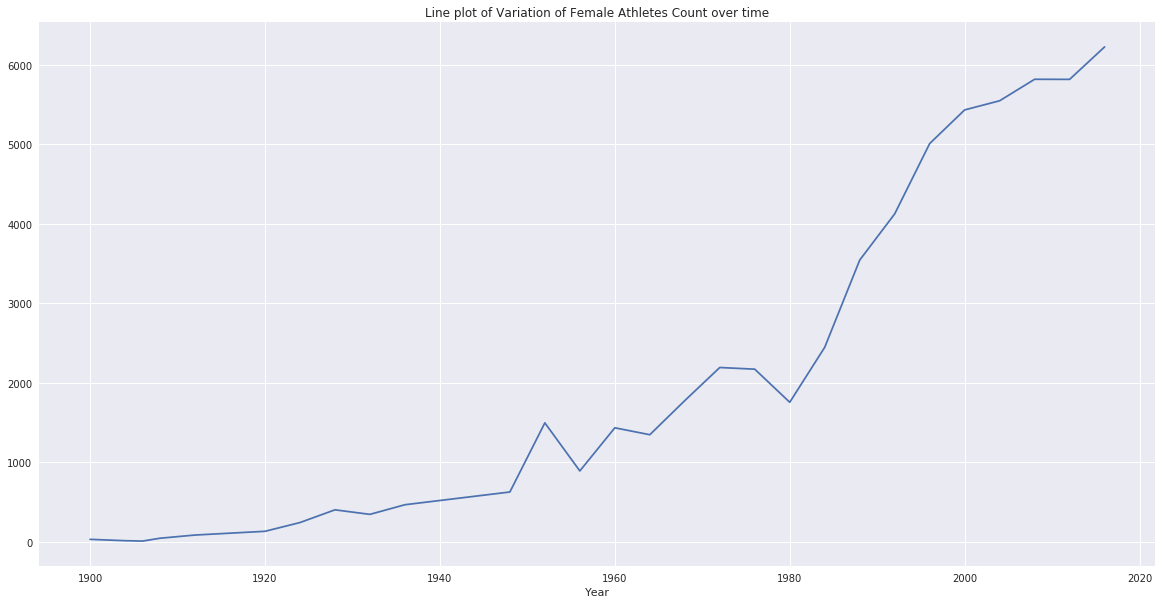

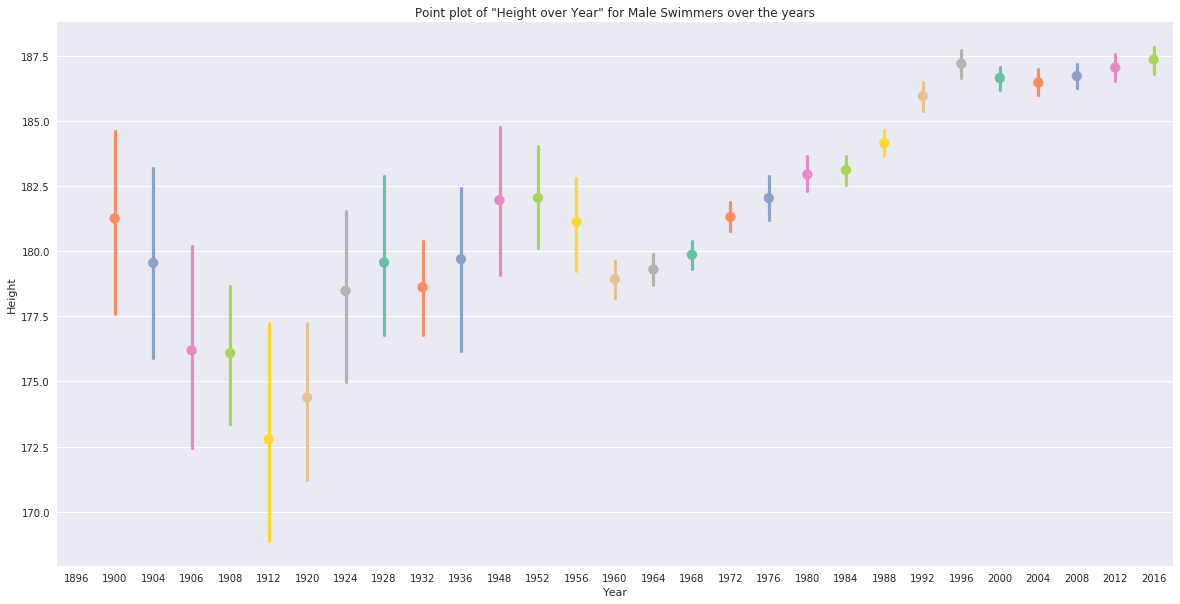

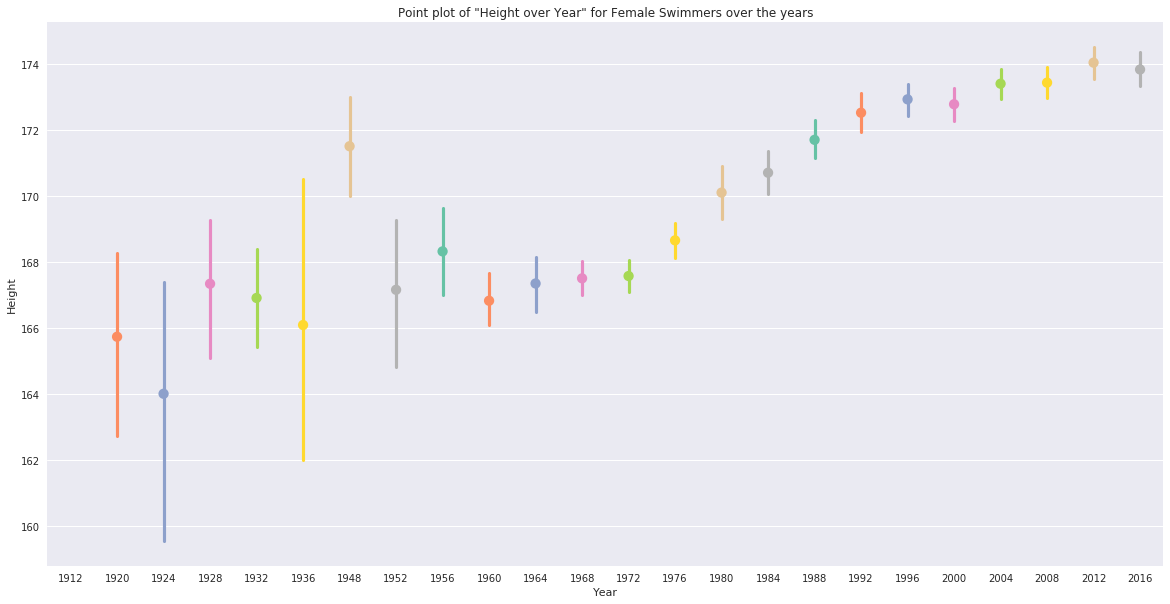

In [21]:
# VARIATION OF MALE & FEMALE ATHLETES OVER TIME CONSIDERING ONLY THE SUMMER GAMES
''' Following is the  line plot of Frequency of Male athletes over time in Summer Olympics  '''
MenOverTime = df_olympics[(df_olympics.Sex == 'M') & (df_olympics.Season == 'Summer')]
part = MenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'M'].plot()
plt.title('Line plot of Variation of Male Athletes Count over time')


''' Following is the  line plot of Frequency of Female athletes over time in Summer Olympics  '''
WomenOverTime = df_olympics[(df_olympics.Sex == 'F') & (df_olympics.Season == 'Summer')]
part = WomenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'F'].plot()
plt.title('Line plot of Variation of Female Athletes Count over time')



''' Following is the point plot of Height VS Year for Male Swimmers over the years'''
swMenOverTime = MenOverTime.loc[MenOverTime['Sport'] == 'Swimming']
plt.figure(figsize=(20, 10))
sns.pointplot('Year', 'Height', data=swMenOverTime, palette='Set2')
plt.title('Point plot of "Height over Year" for Male Swimmers over the years')


''' Following is the point plot of Height VS Year for Female Swimmers over the years'''
swWomenOverTime = WomenOverTime.loc[WomenOverTime['Sport'] == 'Swimming']
plt.figure(figsize=(20, 10))
plt.title('Point plot of "Height over Year" for Female Swimmers over the years')
sns.pointplot('Year', 'Height', data=swWomenOverTime, palette='Set2')